In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
data= pd.read_csv("C:\\Users\\hp\\Downloads\\airline-passengers.csv")
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
t= np.arange(1,145)
data['t']=t
data['t_square']=data['t']*data['t']

log_Passengers=np.log(data['Passengers'])
data['log_Passengers']=log_Passengers

In [4]:
data

,Month,Passengers,t,t_square,log_Passengers
0,1949-01,112,1,1,4.718499
1,1949-02,118,2,4,4.770685
2,1949-03,132,3,9,4.882802
3,1949-04,129,4,16,4.859812
4,1949-05,121,5,25,4.795791
...,...,...,...,...,...
139,1960-08,606,140,19600,6.406880
140,1960-09,508,141,19881,6.230481
141,1960-10,461,142,20164,6.133398
142,1960-11,390,143,20449,5.966147


In [5]:
data['month'] = pd.DatetimeIndex(data['Month']).month


In [6]:
data.head()

,Month,Passengers,t,t_square,log_Passengers,month
0,1949-01,112,1,1,4.718499,1
1,1949-02,118,2,4,4.770685,2
2,1949-03,132,3,9,4.882802,3
3,1949-04,129,4,16,4.859812,4
4,1949-05,121,5,25,4.795791,5


In [7]:
data['month'] = data['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                      ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

In [61]:
airplane = pd.get_dummies(data,   prefix='',   prefix_sep='',   columns=['month'])
airplane.head()

,Month,Passengers,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1949-01,112,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1949-02,118,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1949-03,132,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1949-04,129,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1949-05,121,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

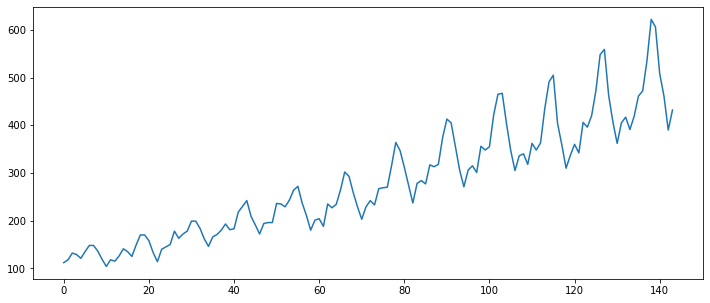

In [62]:
airplane['Passengers'].plot(figsize=(12,5))

<AxesSubplot:>

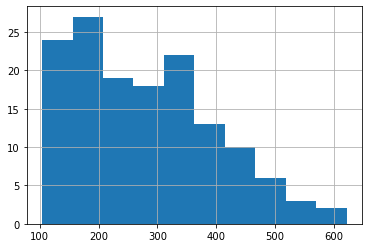

In [63]:
airplane['Passengers'].hist()

## Splitting the data :-

In [64]:
train = airplane.head(132)
test = airplane.tail(12)
train

,Month,Passengers,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1949-01,112,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1949-02,118,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1949-03,132,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1949-04,129,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1949-05,121,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1959-08,559,128,16384,6.326149,0,1,0,0,0,0,0,0,0,0,0,0
128,1959-09,463,129,16641,6.137727,0,0,0,0,0,0,0,0,0,0,0,1
129,1959-10,407,130,16900,6.008813,0,0,0,0,0,0,0,0,0,0,1,0
130,1959-11,362,131,17161,5.891644,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
test

,Month,Passengers,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
132,1960-01,417,133,17689,6.033086,0,0,0,0,1,0,0,0,0,0,0,0
133,1960-02,391,134,17956,5.968708,0,0,0,1,0,0,0,0,0,0,0,0
134,1960-03,419,135,18225,6.037871,0,0,0,0,0,0,0,1,0,0,0,0
135,1960-04,461,136,18496,6.133398,1,0,0,0,0,0,0,0,0,0,0,0
136,1960-05,472,137,18769,6.156979,0,0,0,0,0,0,0,0,1,0,0,0
137,1960-06,535,138,19044,6.282267,0,0,0,0,0,0,1,0,0,0,0,0
138,1960-07,622,139,19321,6.432940,0,0,0,0,0,1,0,0,0,0,0,0
139,1960-08,606,140,19600,6.406880,0,1,0,0,0,0,0,0,0,0,0,0
140,1960-09,508,141,19881,6.230481,0,0,0,0,0,0,0,0,0,0,0,1
141,1960-10,461,142,20164,6.133398,0,0,0,0,0,0,0,0,0,0,1,0


In [66]:
import statsmodels.formula.api as smf

### Linear model :-

In [67]:
model1 = smf.ols('Passengers~t', data=train).fit()

In [68]:
pred_linear = model1.predict(test.t)
pred_linear

132    432.979412
133    435.543127
134    438.106841
135    440.670555
136    443.234269
137    445.797983
138    448.361697
139    450.925411
140    453.489125
141    456.052839
142    458.616554
143    461.180268
dtype: float64

In [69]:
rmse_linear = np.sqrt(np.mean(pred_linear-test.Passengers)**2)
rmse_linear

29.086826625898578

### Exponential model :-

In [70]:
model2 = smf.ols('log_Passengers~t', data=train).fit()

In [71]:
pred_expo = np.exp(model2.predict(test.t))
pred_expo

132    478.266316
133    483.208336
134    488.201424
135    493.246106
136    498.342916
137    503.492392
138    508.695078
139    513.951525
140    519.262288
141    524.627928
142    530.049013
143    535.526114
dtype: float64

In [72]:
rmse_expo = np.sqrt(np.mean(pred_expo-test.Passengers)**2)
rmse_expo

30.23911963927056

### Quadratic model :-

In [73]:
model3 = smf.ols('Passengers~t+t_square', data=train).fit()

In [74]:
pred_quad = model3.predict(test[['t','t_square']])
pred_quad

132    452.552061
133    455.998751
134    459.458621
135    462.931669
136    466.417896
137    469.917302
138    473.429886
139    476.955649
140    480.494591
141    484.046712
142    487.612012
143    491.190490
dtype: float64

In [75]:
rmse_quad = np.sqrt(np.mean(pred_quad-test.Passengers)**2)
rmse_quad

4.416196691558038

### Additive Seasonality model :-

In [78]:
model4 = smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=train).fit()

In [80]:
pred_add_seas = model4.predict(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
pred_add_seas

132    410.722727
133    405.722727
134    441.540909
135    434.359091
136    438.540909
137    476.268182
138    511.631818
139    512.813636
140    468.631818
141    433.813636
142    403.450000
143    431.268182
dtype: float64

In [83]:
rmse_add_seas = np.sqrt(np.mean(pred_add_seas-test.Passengers)**2)
rmse_add_seas

28.76969696969688

### Additive Seasonability Quadratic model :-

In [84]:
model5 = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=train).fit()

In [85]:
pred_add_seas_quad = model5.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])

In [86]:
pred_add_seas_quad

132    430.667180
133    426.640081
134    463.431163
135    457.222245
136    462.376963
137    501.077136
138    537.413672
139    539.568391
140    496.359473
141    462.514191
142    433.123455
143    461.914537
dtype: float64

In [88]:
rmse_add_seas_quad = np.sqrt(np.mean(pred_add_seas_quad-test.Passengers)**2)
rmse_add_seas_quad

3.4742928918866958

### Multiplicative Seasonality model :-

In [89]:
model6 = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=train).fit()

In [95]:
pred_multi_seas = np.exp(model6.predict(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))

In [96]:
pred_multi_seas

132    439.703136
133    436.538581
134    505.546126
135    489.716999
136    492.788346
137    562.800109
138    628.667640
139    630.691067
140    553.384650
141    485.483432
142    426.047576
143    483.211020
dtype: float64

In [99]:
rmse_multi_seas = np.sqrt(np.mean(pred_multi_seas-test.Passengers)**2)
rmse_multi_seas

35.04822354009304

In [101]:
dict_ = { 'Model': ('Linear model','Exponential model','Quadratic model','Additive Seasonality model ','Additive Seasonability Quadratic model','Multiplicative Seasonality model'),
           'Rmse_values': (rmse_linear, rmse_expo, rmse_quad, rmse_add_seas, rmse_add_seas_quad, rmse_multi_seas)}

In [103]:
table = pd.DataFrame(dict_)

In [104]:
table.sort_values('Rmse_values')

,Model,Rmse_values
4,Additive Seasonability Quadratic model,3.474293
2,Quadratic model,4.416197
3,Additive Seasonality model,28.769697
0,Linear model,29.086827
1,Exponential model,30.239120
5,Multiplicative Seasonality model,35.048224


- we have to created a lots of dummy variables which are as follows :-
- 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'



- Also have to created a another columns for using in other models are as follows :-
- squared_t ,  log_Passenger,  t

- We have created total 6 models and there rmse values are given in above table.

- from all the models Additive Seasonability Quadratic model gives good accuracy compared to other model

In [106]:
final= smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=airplane).fit()